# About the Dataset

### World Happiness Report Data for 2017 from their website:

The first World Happiness Report was published in April, 2012, in support of the UN High Level Meeting on happiness and well-being. Since then the world has come a long way. Increasingly, happiness is considered to be the proper measure of social progress and the goal of public policy. In June 2016 the OECD committed itself “to redefine the growth narrative to put people’s well-being at the center of governments’ efforts”. In February 2017, the United Arab Emirates held a full-day World Happiness meeting, as part of the World Government Summit. Now on World Happiness Day, March 20th, we launch the World Happiness Report 2017, once again back at the United Nations, again published by the Sustainable Development Solutions Network, and now supported by a generous three-year grant from the Ernesto Illy Foundation. Some highlights are as follows.

Source: Helliwell, J., Layard, R., & Sachs, J. (2017). World Happiness Report 2017, New York: Sustainable Development Solutions Network.

##### Dictionary:

![Dictionary](img/DictionaryData.png)

##### Labeled Visualized Happiness Data Comparison of various countries on varous factors:

![data1-image](img/Data1_Happiness.png)


![data2-image](img/Data2_Happiness.png)


![data3-image](img/Data3_Happiness.png)





### Review of Regression and Correlation [ To be Completed ]

What is Linear Regression?

Why use Linear Regression?

What is Correlation?

Explain Regression with formulas
    Cost function
    Gradient descent step
    Optimal Coefficients
    Predicting the value
    Accuracy Score
    Plotting

Explain Correlation with formula and graphs

    Correlation Formula
    Correlation Coeff
    Correlation Values and meaning of a positive or negative correlation
    Calculates a Pearson correlation coefficient and the p-value for testing non-correlation.

The Pearson correlation coefficient measures the linear relationship between two datasets. Strictly speaking, Pearson’s correlation requires that each dataset be normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so.



# Explaination of the Code






### Import important libraries 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import scipy as sp

### Read the dataset

In [2]:
# data=pd.read_excel("World Happiness Data.xlsx")
data=pd.read_csv("World Happiness Data.csv")
data1=data[data.year==2016]
data1=data1.reset_index()

In [3]:
data1.head()

index  WP5 Country      country  year  Life Ladder  Log GDP per capita  \
0      8  Afghanistan  Afghanistan  2016     4.220169            7.497288   
1     17      Albania      Albania  2016     4.511101            9.282300   
2     22      Algeria      Algeria  2016     5.388171            9.549138   
3     37    Argentina    Argentina  2016     6.427221                 NaN   
4     48      Armenia      Armenia  2016     4.325472            8.989569   

   Social support  Healthy life expectancy at birth  \
0        0.559072                         49.871265   
1        0.638411                         68.698380   
2        0.748150                         64.829948   
3        0.882819                         67.443993   
4        0.709218                         65.409470   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                      0.522566    0.057393                   0.793246   
1                      0.729819   -0.017927                   0.901071   
2                           NaN         NaN                        NaN   
3                      0.847702         NaN                   0.850924   
4                      0.610987   -0.155814                   0.921421   

   Positive affect  Negative affect  Confidence in national government  \
0         0.564953         0.348332                           0.324990   
1         0.675244         0.321706                           0.400910   
2         0.668838         0.371372                                NaN   
3         0.841907         0.311646                           0.419562   
4         0.593600         0.437228                           0.184713   

   Democratic Quality  Delivery Quality  \
0                 NaN               NaN   
1                 NaN               NaN   
2                 NaN               NaN   
3                 NaN               NaN   
4                 NaN               NaN   

   Standard deviation of ladder by country-year  \
0                                      1.796219   
1                                      2.646668   
2                                      2.109472   
3                                      2.127109   
4                                      2.126364   

   Standard deviation/Mean of ladder by country-year  
0                                           0.425627  
1                                           0.586701  
2                                           0.391501  
3                                           0.330953  
4                                           0.491591

### Preprocessing the Data

In [4]:
data1=data1.drop('index',axis=1)
data1=data1.drop("WP5 Country",axis=1)
data1=data1.drop(["country","year"],axis=1)
Y=data1["Life Ladder"].values
X=data1.drop(["Life Ladder","Democratic Quality","Delivery Quality"],axis=1).values
(data1.head())
# Here the data is being imputed and the missing values are being replaced with the mean of all the values
data1
imp=Imputer(missing_values="NaN",strategy="mean")
X=imp.fit_transform(X)

### Split data into training and test set


In [5]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y)

### Fit Linear Regression Model and Predict

In [6]:
from sklearn.metrics import r2_score

def PearsonR(x,y):
    return(sp.stats.pearsonr(x,y))
def AccuracyScore(ytrue,ypred):
    return r2_score(ytrue,ypred)  
def AccuracyScore(ytrue,ypred):
    return r2_score(ytrue,ypred) 
alg=LR()
alg.fit(xtrain,ytrain)
print('Intercept: ',alg.intercept_)
print("Coefficients : ",alg.coef_)
ypred=alg.predict(xtest)
print('Accuracy of prediction on training set is : ',AccuracyScore(ytrain,alg.predict(xtrain)))
print('Accuracy of prediction on test set is : ',AccuracyScore(ytest,ypred))


Intercept:  1.2354350764935695
Coefficients :  [ 0.23088124  0.84580784  0.01355598  0.03629071  0.88263324 -0.76738663
  1.48410721  1.30088979 -0.12292326  1.04580304 -6.09144138]
Accuracy of prediction on training set is :  0.9303704310755865
Accuracy of prediction on test set is :  0.873330583182428


# Data Visualization and Inferences

In [7]:
#Formula used internally
# xy=x*y
# xsquare=x**2
# ysquare=y**2
# sumXY=xy.sum()
# sumXSquare=xsquare.sum()
# sumYSquare=ysquare.sum()
# N=len(x)

# import math
# denominator=math.sqrt((N*sumXSquare-x.sum()*x.sum())*(N*sumYSquare-y.sum()*y.sum()))
# numerator=(N*sumXY-(sumXSquare)*(sumYSquare))
# r=numerator/denominator

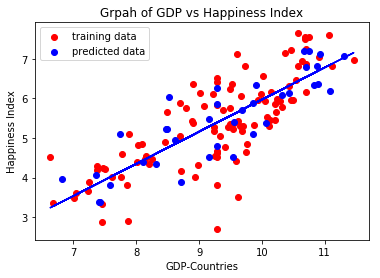

Correlation between data is :  0.7540707232649565


In [8]:
plt.scatter(xtrain[:,0],ytrain,color="red", label="training data")
plt.scatter(xtest[:,0],ypred,color="blue" ,label="predicted data")
alg_pred=LR()
alg_pred.fit(xtrain[:,0].reshape(-1,1),ytrain)
plt.plot(xtrain[:,0],alg_pred.predict(xtrain[:,0].reshape(-1,1)),color="blue")
# plt.scatter(xtest[:,0],ytest,color="black")
plt.xlabel("GDP-Countries")
plt.ylabel("Happiness Index")
plt.title("Grpah of GDP vs Happiness Index")
plt.legend(loc='upper left')
plt.show()

# Metrics for judging the result, calculating correlation
x=xtest[:,0]
y=alg_pred.predict(ytest.reshape(-1,1))
print('Correlation between data is : ',PearsonR(x,y)[0])


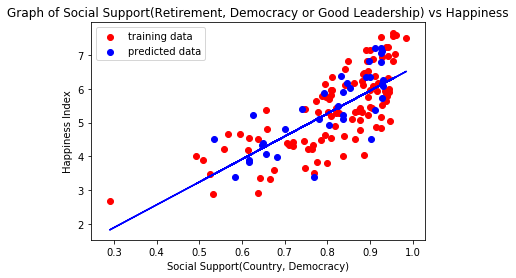

Correlation between data is :  0.7773457684119759


In [9]:
plt.scatter(xtrain[:,1],ytrain,color="red", label="training data")
plt.scatter(xtest[:,1],ypred,color="blue", label="predicted data")
alg_pred=LR()
alg_pred.fit(xtrain[:,1].reshape(-1,1),ytrain)
plt.plot(xtrain[:,1],alg_pred.predict(xtrain[:,1].reshape(-1,1)),color="blue")
plt.xlabel("Social Support(Country, Democracy)")
plt.ylabel("Happiness Index")
plt.title("Graph of Social Support(Retirement, Democracy or Good Leadership) vs Happiness")
plt.legend(loc='upper left')

plt.show()
x=xtest[:,1]
y=alg_pred.predict(ytest.reshape(-1,1))
print('Correlation between data is : ',PearsonR(x,y)[0])



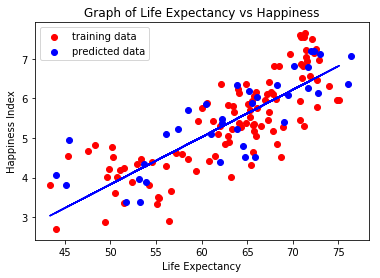

Correlation between data is :  0.6974319727155067


In [10]:
plt.scatter(xtrain[:,2],ytrain,color="red", label="training data")
plt.scatter(xtest[:,2],ypred,color="blue", label="predicted data")
alg_pred=LR()
alg_pred.fit(xtrain[:,2].reshape(-1,1),ytrain)
plt.plot(xtrain[:,2],alg_pred.predict(xtrain[:,2].reshape(-1,1)),color="blue")
plt.xlabel("Life Expectancy")
plt.ylabel("Happiness Index")
plt.title("Graph of Life Expectancy vs Happiness")
plt.legend(loc='upper left')

plt.show()
x=xtest[:,2]
y=alg_pred.predict(ytest.reshape(-1,1))
print('Correlation between data is : ',PearsonR(x,y)[0])


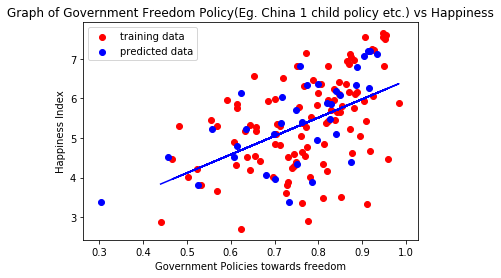

Correlation between data is :  0.6702769787783391


In [11]:
plt.scatter(xtrain[:,3],ytrain,color="red", label="training data")
plt.scatter(xtest[:,3],ypred,color="blue", label="predicted data")
alg_pred=LR()
alg_pred.fit(xtrain[:,3].reshape(-1,1),ytrain)
plt.plot(xtrain[:,3],alg_pred.predict(xtrain[:,3].reshape(-1,1)),color="blue")
plt.xlabel("Government Policies towards freedom")
plt.ylabel("Happiness Index")
plt.title("Graph of Government Freedom Policy(Eg. China 1 child policy etc.) vs Happiness")
plt.legend(loc='upper left')

plt.show()
x=xtest[:,3]
y=alg_pred.predict(ytest.reshape(-1,1))
print('Correlation between data is : ',PearsonR(x,y)[0])
# print("Conclusion: Happy people may or maynot be donating :(- World bank")


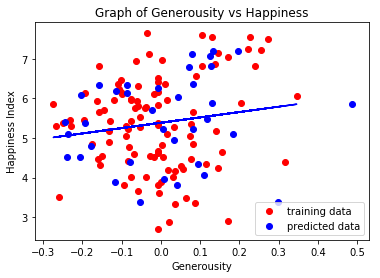

Correlation between data is :  0.10276663101146072
Conclusion: Happy people may or maynot be donating :(- World bank


In [12]:
plt.scatter(xtrain[:,4],ytrain,color="red", label="training data")
plt.scatter(xtest[:,4],ypred,color="blue", label="predicted data")
# plt.scatter(xtest[:,0],ytest,color="black")
alg_pred=LR()
alg_pred.fit(xtrain[:,4].reshape(-1,1),ytrain)
plt.plot(xtrain[:,4],alg_pred.predict(xtrain[:,4].reshape(-1,1)),color="blue") 
plt.xlabel("Generousity")
plt.ylabel("Happiness Index")
plt.title("Graph of Generousity vs Happiness")
plt.legend(loc='lower right')

plt.show()
x=xtest[:,4]
y=alg_pred.predict(ytest.reshape(-1,1))
print('Correlation between data is : ',PearsonR(x,y)[0])
print("Conclusion: Happy people may or maynot be donating :(- World bank")


In [13]:
data1.head(1)

Life Ladder  Log GDP per capita  Social support  \
0     4.220169            7.497288        0.559072   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         49.871265                      0.522566    0.057393   

   Perceptions of corruption  Positive affect  Negative affect  \
0                   0.793246         0.564953         0.348332   

   Confidence in national government  Democratic Quality  Delivery Quality  \
0                            0.32499                 NaN               NaN   

   Standard deviation of ladder by country-year  \
0                                      1.796219   

   Standard deviation/Mean of ladder by country-year  
0                                           0.425627

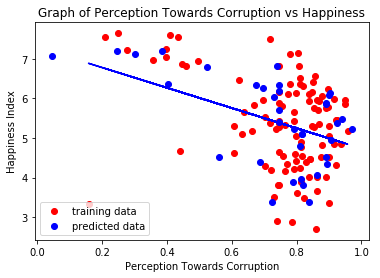

Correlation between data is :  -0.7540707232649567
Conclusion: Negative Correlation, higher the corruption, then lower the happiness gets
Conclusion: Countries where corruption is low,People are very happy but at corrupt places the distinction is lost, though correlation is clearly negative


In [14]:
plt.scatter(xtrain[:,5],ytrain,color="red", label="training data")
plt.scatter(xtest[:,5],ypred,color="blue", label="predicted data")
alg_pred=LR()
alg_pred.fit(xtrain[:,5].reshape(-1,1),ytrain)
plt.plot(xtrain[:,5],alg_pred.predict(xtrain[:,5].reshape(-1,1)),color="blue")
plt.xlabel("Perception Towards Corruption")
plt.ylabel("Happiness Index")
plt.title("Graph of Perception Towards Corruption vs Happiness")
plt.legend(loc='lower left')

plt.show()
x=xtest[:,0]
y=alg_pred.predict(ytest.reshape(-1,1))
print('Correlation between data is : ',PearsonR(x,y)[0])
print("Conclusion: Negative Correlation, higher the corruption, then lower the happiness gets")
print("Conclusion: Countries where corruption is low,People are very happy but at corrupt places the distinction is lost, though correlation is clearly negative")


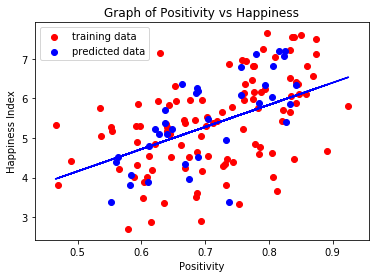

Correlation between data is :  0.7540707232649566


In [15]:
plt.scatter(xtrain[:,6],ytrain,color="red", label="training data")
plt.scatter(xtest[:,6],ypred,color="blue", label="predicted data")
alg_pred=LR()
alg_pred.fit(xtrain[:,6].reshape(-1,1),ytrain)
plt.plot(xtrain[:,6],alg_pred.predict(xtrain[:,6].reshape(-1,1)),color="blue")
plt.xlabel("Positivity")
plt.ylabel("Happiness Index")
plt.title("Graph of Positivity vs Happiness")
plt.legend(loc='upper left')

plt.show()
x=xtest[:,0]
y=alg_pred.predict(ytest.reshape(-1,1))
print('Correlation between data is : ',PearsonR(x,y)[0])



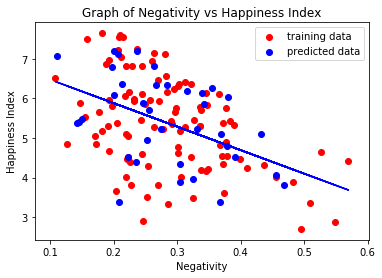

Correlation between data is :  -0.7540707232649566


In [17]:
plt.scatter(xtrain[:,7],ytrain,color="red", label="training data")
plt.scatter(xtest[:,7],ypred,color="blue", label="predicted data")
alg_pred=LR()
alg_pred.fit(xtrain[:,7].reshape(-1,1),ytrain)
plt.plot(xtrain[:,7],alg_pred.predict(xtrain[:,7].reshape(-1,1)),color="blue")
plt.xlabel("Negativity")
plt.ylabel("Happiness Index")
plt.title("Graph of Negativity vs Happiness Index")
plt.legend(loc='upper right')

plt.show()
x=xtest[:,0]
y=alg_pred.predict(ytest.reshape(-1,1))
print('Correlation between data is : ',PearsonR(x,y)[0])


# Advanced OLS Analysis

In [80]:
# data=pd.read_excel("World Happiness Data.xlsx")
data=pd.read_csv("World Happiness Data.csv")
data1=data[data.year==2016]
data1=data1.reset_index()


### Data Preprocessing

In [81]:
# data1=data1.drop('index',axis=1)
# data1=data1.drop("WP5 Country",axis=1)
# data1=data1.drop(["country","year"],axis=1)
# Y=data1["Life Ladder"].values
# X=data1.drop(["Life Ladder","Democratic Quality","Delivery Quality"],axis=1).values
# data1.drop(["Life Ladder","Democratic Quality","Delivery Quality"],axis=1,inplace=True)

# # Here the data is being imputed and the missing values are being replaced with the mean of all the values
# data1
# imp=Imputer(missing_values="NaN",strategy="mean")
# X=imp.fit_transform(X)
# data1
data1=data1.drop('index',axis=1)
data1=data1.drop("WP5 Country",axis=1)
data1=data1.drop(["country","year"],axis=1)
Y=data1["Life Ladder"].values
X=data1.drop(["Life Ladder","Democratic Quality","Delivery Quality","Standard deviation of ladder by country-year","Standard deviation/Mean of ladder by country-year"],axis=1).values
data1=data1.drop(["Life Ladder","Democratic Quality","Delivery Quality","Standard deviation of ladder by country-year","Standard deviation/Mean of ladder by country-year"],axis=1)

# Here the data is being imputed and the missing values are being replaced with the mean of all the values
data1
imp=Imputer(missing_values="NaN",strategy="mean")
X=imp.fit_transform(X)
data1

Log GDP per capita  Social support  Healthy life expectancy at birth  \
0              7.497288        0.559072                         49.871265   
1              9.282300        0.638411                         68.698380   
2              9.549138        0.748150                         64.829948   
3                   NaN        0.882819                         67.443993   
4              8.989569        0.709218                         65.409470   
5             10.696281        0.942334                         72.521629   
6             10.694595        0.926319                         71.645653   
7              9.691197        0.777271                         62.044926   
8             10.706777        0.862700                         65.963921   
9              8.100570        0.649117                         62.046188   
10             9.684698        0.926551                         65.764771   
11            10.632178        0.928964                         71.521675   
12             7.621523        0.492816                         50.769245   
13             8.797091        0.795959                         60.045620   
14             9.240182        0.807705                         67.775581   
15             9.624713        0.768303                         55.193623   
16             9.525511        0.912455                         64.830925   
17             9.766367        0.926036                         68.229729   
18             7.376117        0.764401                         51.107002   
19             8.146678        0.745901                         58.536938   
20             8.020016        0.659300                         48.338280   
21            10.674513        0.924393                         72.298302   
22                  NaN        0.290184                         44.023220   
23             7.584248        0.616205                         45.108143   
24            10.010036        0.841388                         71.831139   
25             9.561012        0.741703                         69.066704   
26             9.486231        0.881900                         64.006058   
27             8.711130        0.615449                         53.898865   
28             6.632929        0.864155                         50.290081   
29             9.609200        0.900701                         69.661774   
..                  ...             ...                               ...   
111           11.300004        0.925128                         76.408699   
112           10.247341        0.945179                         68.163254   
113           10.287356        0.934487                         70.800308   
114                 NaN        0.594417                         47.562763   
115            9.415354        0.875390                         50.198864   
116           10.467950        0.811163                         74.854126   
117            7.461286        0.532152                         49.400600   
118           10.427800        0.941737                         73.959724   
119           10.744304        0.912061                         71.961449   
120           10.917511        0.927628                         72.957100   
121                 NaN        0.894989                         70.980003   
122            7.886899        0.856657                         61.759045   
123            7.867351        0.637756                         56.473747   
124            9.659873        0.907544                         65.799553   
125            7.254559        0.509441                         52.329899   
126            9.288296        0.701822                         64.561813   
127            9.873839        0.879995                         65.597237   
128            9.687181        0.929032                         58.562210   
129            7.465327        0.753540                         51.461929   
130            8.929477        0.884961                         63.213604   
1

### OLS Analysis, removing the extra features from the dataset 

1) Contibuting <.05% to regression

2) The reason is the strong correlation between these features and other features

3) Removing these features won't affect accuracy, it will increase computation speed

4) Interesting insights can be generated that 

5) Health life expectancy at birth, Positive and Negative Effects don't play any significant role in regression. Reason? Because they are strongly correlated with other variables

In [88]:
import statsmodels.formula.api as sm
def backwardElimination(x, sl):
    y=Y
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    print("removing parameter ",j)
    regressor_OLS.summary()
    return x
 

SL = 0.05
print(X.shape)
X_opt = X[:, [0, 1, 2, 3, 4, 5,6,7,8]]
X_Modeled = backwardElimination(X_opt, SL)
X_Modeled.shape

(141, 9)
removing parameter  7
removing parameter  6
removing parameter  2


(141, 6)

In [59]:
xtrain,xtest,ytrain,ytest=train_test_split(X_Modeled,Y)

In [60]:
from sklearn.metrics import r2_score

def PearsonR(x,y):
    return(sp.stats.pearsonr(x,y))
def AccuracyScore(ytrue,ypred):
    return r2_score(ytrue,ypred)  
def AccuracyScore(ytrue,ypred):
    return r2_score(ytrue,ypred) 
alg=LR()
alg.fit(xtrain,ytrain)
print('Intercept: ',alg.intercept_)
print("Coefficients : ",alg.coef_)
ypred=alg.predict(xtest)
print('Accuracy of prediction on training set is : ',AccuracyScore(ytrain,alg.predict(xtrain)))
print('Accuracy of prediction on test set is : ',AccuracyScore(ytest,ypred))


Intercept:  1.922554656249409
Coefficients :  [ 0.23152261  0.49530911  0.73772447  0.77121478  0.94851938  0.27668825
  1.2369183  -7.1731451 ]
Accuracy of prediction on training set is :  0.9177664709368956
Accuracy of prediction on test set is :  0.903239032598683


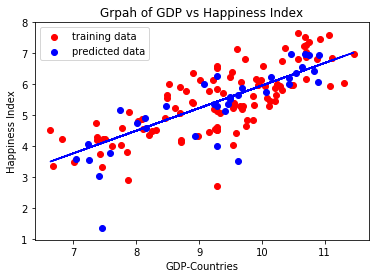

Correlation between data is :  0.8180945291313684


In [84]:
plt.scatter(xtrain[:,0],ytrain,color="red", label="training data")
plt.scatter(xtest[:,0],ypred,color="blue" ,label="predicted data")
alg_pred=LR()
alg_pred.fit(xtrain[:,0].reshape(-1,1),ytrain)
plt.plot(xtrain[:,0],alg_pred.predict(xtrain[:,0].reshape(-1,1)),color="blue")
# plt.scatter(xtest[:,0],ytest,color="black")
plt.xlabel("GDP-Countries")
plt.ylabel("Happiness Index")
plt.title("Grpah of GDP vs Happiness Index")
plt.legend(loc='upper left')
plt.show()

# Metrics for judging the result, calculating correlation
x=xtest[:,0]
y=alg_pred.predict(ytest.reshape(-1,1))
print('Correlation between data is : ',PearsonR(x,y)[0])


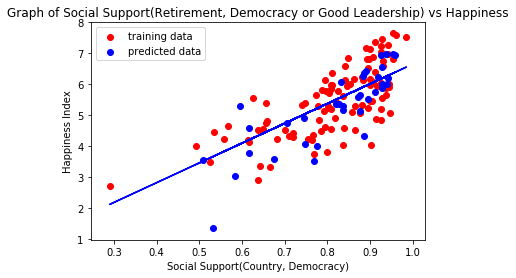

Correlation between data is :  0.8069619827217409


In [85]:
plt.scatter(xtrain[:,1],ytrain,color="red", label="training data")
plt.scatter(xtest[:,1],ypred,color="blue", label="predicted data")
alg_pred=LR()
alg_pred.fit(xtrain[:,1].reshape(-1,1),ytrain)
plt.plot(xtrain[:,1],alg_pred.predict(xtrain[:,1].reshape(-1,1)),color="blue")
plt.xlabel("Social Support(Country, Democracy)")
plt.ylabel("Happiness Index")
plt.title("Graph of Social Support(Retirement, Democracy or Good Leadership) vs Happiness")
plt.legend(loc='upper left')

plt.show()
x=xtest[:,1]
y=alg_pred.predict(ytest.reshape(-1,1))
print('Correlation between data is : ',PearsonR(x,y)[0])



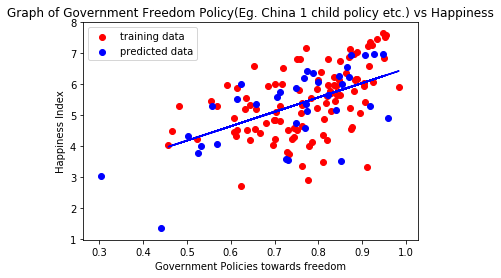

Correlation between data is :  0.05820782621424097


In [86]:
plt.scatter(xtrain[:,2],ytrain,color="red", label="training data")
plt.scatter(xtest[:,2],ypred,color="blue", label="predicted data")
alg_pred=LR()
alg_pred.fit(xtrain[:,2].reshape(-1,1),ytrain)
plt.plot(xtrain[:,2],alg_pred.predict(xtrain[:,2].reshape(-1,1)),color="blue")
plt.xlabel("Government Policies towards freedom")
plt.ylabel("Happiness Index")
plt.title("Graph of Government Freedom Policy(Eg. China 1 child policy etc.) vs Happiness")
plt.legend(loc='upper left')

plt.show()
x=xtest[:,3]
y=alg_pred.predict(ytest.reshape(-1,1))
print('Correlation between data is : ',PearsonR(x,y)[0])
# print("Conclusion: Happy people may or maynot be donating :(- World bank")


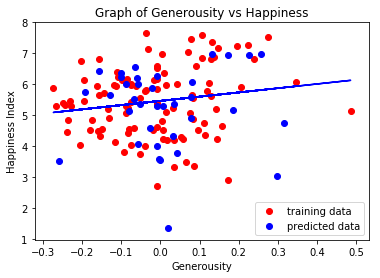

Correlation between data is :  0.463901581918487
Conclusion: Happy people may or maynot be donating :(- World bank


In [87]:
plt.scatter(xtrain[:,3],ytrain,color="red", label="training data")
plt.scatter(xtest[:,3],ypred,color="blue", label="predicted data")
# plt.scatter(xtest[:,0],ytest,color="black")
alg_pred=LR()
alg_pred.fit(xtrain[:,3].reshape(-1,1),ytrain)
plt.plot(xtrain[:,3],alg_pred.predict(xtrain[:,3].reshape(-1,1)),color="blue") 
plt.xlabel("Generousity")
plt.ylabel("Happiness Index")
plt.title("Graph of Generousity vs Happiness")
plt.legend(loc='lower right')

plt.show()
x=xtest[:,4]
y=alg_pred.predict(ytest.reshape(-1,1))
print('Correlation between data is : ',PearsonR(x,y)[0])
print("Conclusion: Happy people may or maynot be donating :(- World bank")


In [ ]:
[ 7.49728775e+00  5.59071779e-01  4.98712654e+01  5.22566199e-01
   5.73931520e-02  7.93245554e-01  5.64952672e-01  3.48332286e-01
   3.24989557e-01  1.79621947e+00  4.25627410e-01]

[ 7.49728775e+00  5.59071779e-01  5.22566199e-01  5.73931520e-02
   5.64952672e-01  3.48332286e-01  1.79621947e+00  4.25627410e-01]
data1=data1.drop('index',axis=1)
data1=data1.drop("WP5 Country",axis=1)
data1=data1.drop(["country","year"],axis=1)
Y=data1["Life Ladder"].values
X=data1.drop(["Life Ladder","Democratic Quality","Delivery Quality","Standard deviation of ladder by country-year","Standard deviation/Mean of ladder by country-year"],axis=1).values
data1.drop(["Life Ladder","Democratic Quality","Delivery Quality","Standard deviation of ladder by country-year","Standard deviation/Mean of ladder by country-year"],axis=1,inplace=True)

# Here the data is being imputed and the missing values are being replaced with the mean of all the values
data1
imp=Imputer(missing_values="NaN",strategy="mean")
X=imp.fit_transform(X)
data1